In order to maintain a good CRM (Customer Relationship Management), a company should be aware of each customer’s attitude towards the company. The company should know the answers to the following questions:     
1. when did the customer last purchased? (Recency)   
2. how often does the customer purchase?  (Frequency)  
3. how much money did the customer spend?  (Monetary)   

The answers to the above questions would make the customer be categorized and after this process, the company would be dealing with tens of segments instead of tens of thousands customers. **RFM** is an acronym that stands for **Recency**, **Frequency** and **Monetary**. In order to assign each customer into the appropriate segment, RFM metrics should be calculated and afterwards RFM scores should be computed.


## Getting to know the variables:

**InvoiceNo**   : The number of the invoice, unique per each purchase. Refund invoice numbers contain "C"  
**StockCode**   : Unique code per each item  
**Description** : Name of the item  
**Quantity**    : The number of items within the invoice  
**InvoiceDate** : Date and time of the purchase  
**UnitPrice**   : Price of a single item, as of Sterlin  
**CustomerID**  : Unique id number per each customer  
**Country**     : The country where the customer is living  


## install packages and set configurations


In [1]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import plotly.offline as offline
offline.init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read data

In [3]:
df_ = pd.read_excel(r"C:\Users\raval\Downloads\Online Retail.xlsx") 
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   Price        541909 non-null  float64       
 6   Customer ID  406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


how many countries in df:

In [5]:
df['Country'].nunique()

38

the names of the countries with the total values:

In [6]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

the most expensive products:

In [7]:
df.sort_values(by='Price', ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00000,15098.00000,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46000,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02000,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71000,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33000,NaN,United Kingdom


number of unique products:

In [8]:
df['Description'].nunique()

4223

most purchased items:

In [9]:
df.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


check the number of uniques for StockCode ve Description variables:

In [10]:
print(f"Number of uniques in StockCode: {df['StockCode'].nunique()}")
print(f"Number of uniques in Description:{df['Description'].nunique()}")

Number of uniques in StockCode: 4070
Number of uniques in Description:4223


the values were expected to be equal, so there must be more than one unique value in Description variable for one unique StockCode. let's check each StockCode value with the corresponding Description values, get every StockCode that has more than one unique Description in a list form 

In [11]:
a =df.groupby('StockCode').agg({'Description': "nunique"})
a.reset_index(inplace=True)
a.head()
b = list(a.loc[a['Description'] > 1, 'StockCode'])   

for x in b:
    print(f"{x} = {df.loc[df['StockCode'] == x, 'Description'].unique()}")

10080 = ['GROOVY CACTUS INFLATABLE' nan 'check']
10133 = ['COLOURING PENCILS BROWN TUBE' 'damaged']
16008 = ['SMALL FOLDING SCISSOR(POINTED EDGE)' 'check']
16045 = ['POPART WOODEN PENCILS ASST' nan 'check']
20622 = ['VIPPASSPORT COVER ' 'VIP PASSPORT COVER ']
20652 = ['BLUE POLKADOT LUGGAGE TAG ' 'check']
20665 = ['RED RETROSPOT PURSE ' nan 'dotcom' 'adjustment']
20681 = ['PINK POLKADOT CHILDRENS UMBRELLA' 'MIA' nan]
20694 = ['FLORAL PINK MONSTER' '?']
20700 = ['GREEN CAT FLORAL CUSHION COVER ' '?']
20711 = ['JUMBO BAG TOYS ' 'check' 'lost in space']
20713 = ['JUMBO BAG OWLS' nan 'wrongly marked. 23343 in box' 'wrongly coded-23343'
 'found' 'Found' 'wrongly marked 23343' 'Marked as 23343'
 'wrongly coded 23343']
20725 = ['LUNCH BAG RED RETROSPOT' 'LUNCH BAG RED SPOTTY']
20748 = ['KENSINGTON COFFEE SET' 'Found' nan]
20751 = ['FUNKY WASHING UP GLOVES ASSORTED' 'check']
20752 = ['BLUE POLKADOT WASHING UP GLOVES' nan 'check']
20754 = ['RETROSPOT RED WASHING UP GLOVES' 'Found']
20774 = ['GR

22134 = ['LADLE LOVE HEART RED ' 'MINI LADLE LOVE HEART RED ']
22135 = ['LADLE LOVE HEART PINK' 'MINI LADLE LOVE HEART PINK']
22139 = ['RETROSPOT TEA SET CERAMIC 11 PC ' nan 'amazon']
22142 = ['CHRISTMAS CRAFT WHITE FAIRY ' 'check']
22147 = ['FELTCRAFT BUTTERFLY HEARTS' 'check']
22149 = ['FELTCRAFT 6 FLOWER FRIENDS' 'damages' 'check' nan]
22152 = ['PLACE SETTING WHITE STAR' 'check']
22171 = ['3 HOOK PHOTO SHELF ANTIQUE WHITE' '?' nan]
22176 = ['BLUE OWL SOFT TOY' 'check' 'amazon']
22179 = ['SET 10 LIGHTS NIGHT OWL' 'SET 10 NIGHT OWL LIGHTS']
22181 = ['SNOWSTORM PHOTO FRAME FRIDGE MAGNET' 'check']
22197 = ['SMALL POPCORN HOLDER' 'POPCORN HOLDER']
22199 = ['FRYING PAN RED RETROSPOT' 'FRYING PAN RED POLKADOT ']
22217 = ['T-LIGHT HOLDER HANGING LACE' 'damages?']
22219 = ['LOVEBIRD HANGING DECORATION WHITE ' '???lost']
22246 = ['MAGIC GARDEN FELT GARLAND ' 'GARLAND, MAGIC GARDEN 1.8M']
22268 = ['EASTER DECORATION SITTING BUNNY' 'DECORATION SITTING BUNNY' nan 'check']
22271 = ['FELTCRAFT DOL

23031 = ['DRAWER KNOB CRACKLE GLAZE PINK' 'DOORKNOB CRACKED GLAZE PINK']
23032 = ['DRAWER KNOB CRACKLE GLAZE IVORY' 'DOORKNOB CRACKED GLAZE IVORY'
 'damages']
23035 = ['DRAWER KNOB CERAMIC IVORY' 'DOORKNOB CERAMIC IVORY' 'check']
23040 = ['PAPER LANTERN 9 POINT SNOW STAR ' 'PAPER LANTERN 9 POINT SNOW STAR']
23041 = ['PAPER LANTERN 9 POINT SNOW STAR' 'PAPER LANTERN 6 POINT SNOW STAR']
23043 = ['PAPER LANTERN 9 POINT HOLLY STAR 40'
 'PAPER LANTERN 9 POINT HOLLY STAR L']
23044 = ['PAPER LANTERN 9 POINT HOLLY STAR S'
 'PAPER LANTERN 9 POINT HOLLY STAR 23']
23045 = ['PAPER LANTERN 5 POINT STAR MOON 30' 'PAPER LANTERN 5 POINT STAR MOON ']
23047 = ['PAPER LANTERN 5 POINT SEQUIN STAR' 'PAPER LANTERN 5 POINT STUDDED STAR']
23055 = ['IVORY CHANDELIER T-LIGHT HOLDER' 'rusty thrown away']
23056 = ['FLOWERS CHANDELIER T-LIGHT HOLDER' 'CRYSTAL CHANDELIER T-LIGHT HOLDER'
 'rusty throw away']
23057 = ['GEMSTONE CHANDELIER T-LIGHT HOLDER' 'BEADED CHANDELIER T-LIGHT HOLDER'
 'rusty throw away']
23061 = 

23412 = ['HEART MIRROR ANTIQUE WHITE' '?' nan]
23413 = ['VINTAGE COFFEE GRINDER BOX' 'DECROTIVEVINTAGE COFFEE GRINDER BOX'
 'DECORATIVE VINTAGE COFFEE  BOX']
23427 = ['STOOL HOME SWEET HOME ' 'damaged']
23436 = ['GIFT BAG LARGE VINTAGE CHRISTMAS' 'VINTAGE CHRISTMAS GIFT BAG LARGE ']
23437 = [" 50'S CHRISTMAS GIFT BAG LARGE" "GIFT BAG LARGE 50'S CHRISTMAS"]
23438 = [' RED SPOT GIFT BAG LARGE' 'GIFT BAG LARGE SPOT ']
23454 = ['SET OF 3 MINI HANGING PORTRAITS' 'THREE MINI HANGING FRAMES']
23455 = ['SMALL PARLOUR PICTURE FRAME' 'SMALL PARLOUR FRAME']
23456 = ['MEDIUM PARLOUR PICTURE FRAME ' 'MEDIUM PARLOUR FRAME ']
23457 = ['LARGE PARLOUR PICTURE FRAME' 'LARGE PARLOUR FRAME']
23462 = ['ROCOCO WALL MIRROR WHITE' 'ROCOCO WALL MIROR' 'damages']
23465 = ['TUSCAN VILLA FEEDING STATION' 'TUSCAN VILLA BIRD FEEDER']
23466 = ['TUSCAN VILLA DOVECOTE' 'TUSCAN VILLA DOVECOTE BIRD FEEDER']
23484 = ['HEART TRELLISTRIPLE T-LIGHT HOLDER'
 'HEART TRELLIS TRIPLE T-LIGHT HOLDER']
23489 = ['GARLAND, VINTAGE B

35833P = ['4 PINK FLOCK CHRISTMAS BALLS' 'check']
35915C = ['PEACH KNITTED HEN ' 'damaged' nan]
35916B = ['BLUE FELT HANGING HEART W FLOWER' nan
 'BLUE FELT HANGING HEART WITH FLOWER']
37479B = ['CUBIC MUG FLOCK BLUE ON BROWN' 'sold as set by dotcom' nan]
37479P = ['CUBIC MUG FLOCK PINK ON BROWN' 'sold as set on dotcom' '??']
37482P = ['CUBIC MUG PINK POLKADOT' 'Damaged']
37487B = ['YELLOW/ORANGE FLOWER DESIGN PLATE' 'Damaged']
37488A = ['YELLOW PINK FLOWER DESIGN BIG BOWL' 'damaged']
46000M = ['POLYESTER FILLER PAD 45x45cm' 'Dotcom sales']
46000S = ['POLYESTER FILLER PAD 40x40cm' 'Dotcom sales' 'Dotcom' 'dotcom sales']
46000U = ['POLYESTER FILLER PAD 30CMx30CM' 'check']
47013A = ['WINE BOTTLE DRESSING LT.BLUE' 'damaged']
47310M = ['SMALL POP BOX,FUNKY MONKEY' 'SMALL POP BOX FUNKY MONKEY']
47503A = ['ASS FLORAL PRINT MULTI SCREWDRIVER' 'check' nan]
47503H = ['ASS FLORAL PRINT SPIRIT LEVEL ' 'check' 'found']
47556B = [nan 'TEA TIME TEA TOWELS ' 'did  a credit  and did not tick ret']
475

as an example derived from the above list, both the Descriptions: 'PINK SPOTTY BOWL' and 'PINK POLKADOT BOWL' have the same StockCode: 20677. This means that there are duplicates in Description variable (possibly due to manuel entries or merge) so it would be better to use StockCode.

In [12]:
df.loc[df['StockCode'] == 20677, 'Description'].unique() 

array(['PINK POLKADOT BOWL'], dtype=object)

## Data Preperation

drop na values

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   Price        406829 non-null  float64       
 6   Customer ID  406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [15]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,406829.00000,12.06130,248.69337,-80995.00000,-2.00000,1.00000,1.00000,2.00000,5.00000,12.00000,24.00000,36.00000,120.00000,80995.00000
Price,406829.00000,3.46047,69.31516,0.00000,0.21000,0.42000,0.55000,1.25000,1.95000,3.75000,6.75000,8.50000,15.00000,38970.00000
Customer ID,406829.00000,15287.69057,1713.60030,12346.00000,12415.00000,12626.00000,12876.00000,13953.00000,15152.00000,16791.00000,17719.00000,17905.00000,18212.00000,18287.00000


there are negative values on Quantity variable, this is caused by the refund invoices (Invoices containing the letter "C"), reassign df without refund invoices

In [16]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [17]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,397924.00000,13.02182,180.42021,1.00000,1.00000,1.00000,1.00000,2.00000,6.00000,12.00000,24.00000,36.00000,120.00000,80995.00000
Price,397924.00000,3.11617,22.09679,0.00000,0.21000,0.42000,0.55000,1.25000,1.95000,3.75000,6.35000,8.50000,14.95000,8142.75000
Customer ID,397924.00000,15294.31517,1713.16988,12346.00000,12415.00000,12627.00000,12883.00000,13969.00000,15159.00000,16795.00000,17725.00000,17912.00000,18211.00000,18287.00000


negative values are excluded. We are not removing outliers (such as the max value on Quantity and Price variables) because we will be scoring the dataset.

In [18]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [19]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


## RFM Metrics

the last date of purchase:

In [20]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

assign "today's date" as 2 days after the last date of purchase to make sure that none of the Recency values become zero

In [21]:
today_date = df['InvoiceDate'].max() + dt.timedelta(days=2)
today_date

Timestamp('2011-12-11 12:50:00')

create a new df called rfm in order to calculate Recency, Frequency and Monetary values.  
df is grouped by customers and:   

* the number of days between today_date and the last purchase date of this customer is **Recency**  
* the number of unique invoices of this customer is **Frequency**  
* the sum of TotalPrice is this customer's **Monetary**  


In [22]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                    'Invoice': lambda inv: inv.nunique(),
                                    'TotalPrice': lambda price: price.sum()})

In [23]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00000,327,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,20,1,1757.55000
12350.00000,311,1,334.40000


renaming rfm columns:

In [24]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00000,327,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,20,1,1757.55000
12350.00000,311,1,334.40000


check if there are any zeros in rfm:

In [25]:
rfm.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Recency,4339.00000,93.51832,100.00975,2.00000,2.00000,4.00000,6.00000,19.00000,52.00000,143.00000,264.00000,313.00000,370.00000,375.00000
Frequency,4339.00000,4.27195,7.70549,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,5.00000,9.00000,13.00000,30.00000,210.00000
Monetary,4339.00000,2053.79302,8988.24838,0.00000,52.07600,112.24500,156.56600,307.24500,674.45000,1661.64000,3646.16400,5840.18200,19880.09180,280206.02000


## RFM Scores

* the min number of Recency metric means that this customer has just purchased, so the highest score (5) should be given to the lower number of Recency.  
* the max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score (5) should be given to the highest Frequency and Monetary values.

In [26]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [27]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.00000,327,1,77183.60000,1,1,5,115
12347.00000,3,7,4310.00000,5,5,5,555
12348.00000,76,4,1797.24000,2,4,4,244
12349.00000,20,1,1757.55000,4,1,4,414
12350.00000,311,1,334.40000,1,1,2,112


display some of the customers with the highest scores:

In [28]:
rfm[rfm['RFM_SCORE'] == "555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12347.00000,3,7,4310.00000,5,5,5,555
12362.00000,4,10,5226.23000,5,5,5,555
12417.00000,4,9,3649.10000,5,5,5,555
12433.00000,2,7,13375.87000,5,5,5,555
12437.00000,3,18,4951.41000,5,5,5,555


## Naming the RFM Scores

the following dict has been made according to the famous RFM graphic

In [29]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

we will be using Recency and Frequency scores for customer segmentation. We are assuming that a customer who has recently purchased and who is often purchasing should have high RFM scores.

In [30]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.00000,327,1,77183.60000,1,1,5,115,11
12347.00000,3,7,4310.00000,5,5,5,555,55
12348.00000,76,4,1797.24000,2,4,4,244,24
12349.00000,20,1,1757.55000,4,1,4,414,41
12350.00000,311,1,334.40000,1,1,2,112,11


in the last step, we will convert the metrics into category names

In [31]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.00000,327,1,77183.60000,1,1,5,115,Hibernating
12347.00000,3,7,4310.00000,5,5,5,555,Champions
12348.00000,76,4,1797.24000,2,4,4,244,At_Risk
12349.00000,20,1,1757.55000,4,1,4,414,Promising
12350.00000,311,1,334.40000,1,1,2,112,Hibernating


see the number of customers that fall into each category

In [32]:
rfm['Segment'].value_counts()

Hibernating            1065
Loyal_Customers         827
Champions               633
At_Risk                 580
Potential_Loyalists     492
About_to_Sleep          351
Need_Attention          186
Promising               100
Cant_Loose               63
New_Customers            42
Name: Segment, dtype: int64

In [33]:
df_local =  pd.DataFrame(rfm["Segment"].value_counts() ).sort_values(by='Segment', ascending=False)
fig = px.pie(df_local , values='Segment', names=df_local.index, title='Customers Rating wise chart')
fig.show()

# **Creating Frequency Monetary and Recency Plots Based on their Ratings**

In [34]:
df_local =  rfm.groupby('Segment').agg({"Frequency" : "sum"}).reset_index()
fig = px.pie(df_local , values='Frequency', names="Segment", title='Customers Ratings Frequency wise segmentation')
fig.show()

df_local =  rfm.groupby('Segment').agg({"Monetary" : "sum"}).reset_index()
fig = px.pie(df_local , values='Monetary', names="Segment", title='Customers  Ratings Monetary wise segmentation')
fig.show()

df_local =  rfm.groupby('Segment').agg({"Recency" : "sum"}).reset_index()
fig = px.pie(df_local , values='Recency', names="Segment", title='Customers Ratings Recency wise segmentation')
fig.show()

# **Creating Frequency Monetary and Recency Plots Based on Customer IDS**

In [35]:
#grouping Customer Ids on basis of Recency and getting top 15 customers
df_local =  rfm.groupby('Customer ID').agg({"Recency" : "sum"}).reset_index()[:15]
fig = px.pie(df_local , values='Recency', names="Customer ID", title='Customers ID Recency wise segmentation')
fig.show()

In [36]:
#grouping Customer Ids on basis of Frequency and getting top 15 customers
df_local =  rfm.groupby('Customer ID').agg({"Frequency" : "sum"}).reset_index()[:15]
fig = px.pie(df_local , values='Frequency', names="Customer ID", title='Customers ID Frequency wise segmentation')
fig.show()

In [37]:
# #grouping Customer Ids on basis of Monetary and getting top 15 customers
# df_local =  rfm.groupby('Customer ID').agg({"Monetary" : "sum"}).reset_index()[:15]
# fig = px.pie(df_local , values='Monetary', names="Customer ID", title='Customers ID Monetary wise segmentation')
# fig.show()

df_local =  rfm.groupby('Customer ID').agg({"Monetary" : "sum"}).reset_index()[:15]
trace = go.Pie(labels = df_local["Customer ID"], values = df_local["Monetary"], 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'green'], 
                           line=dict(color='#000000', width=2.5)))


layout = dict(title =  'Customers ID Monetary wise segmentation')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

# **Plotting Distribution of Our Recency Frequency and Monetary**

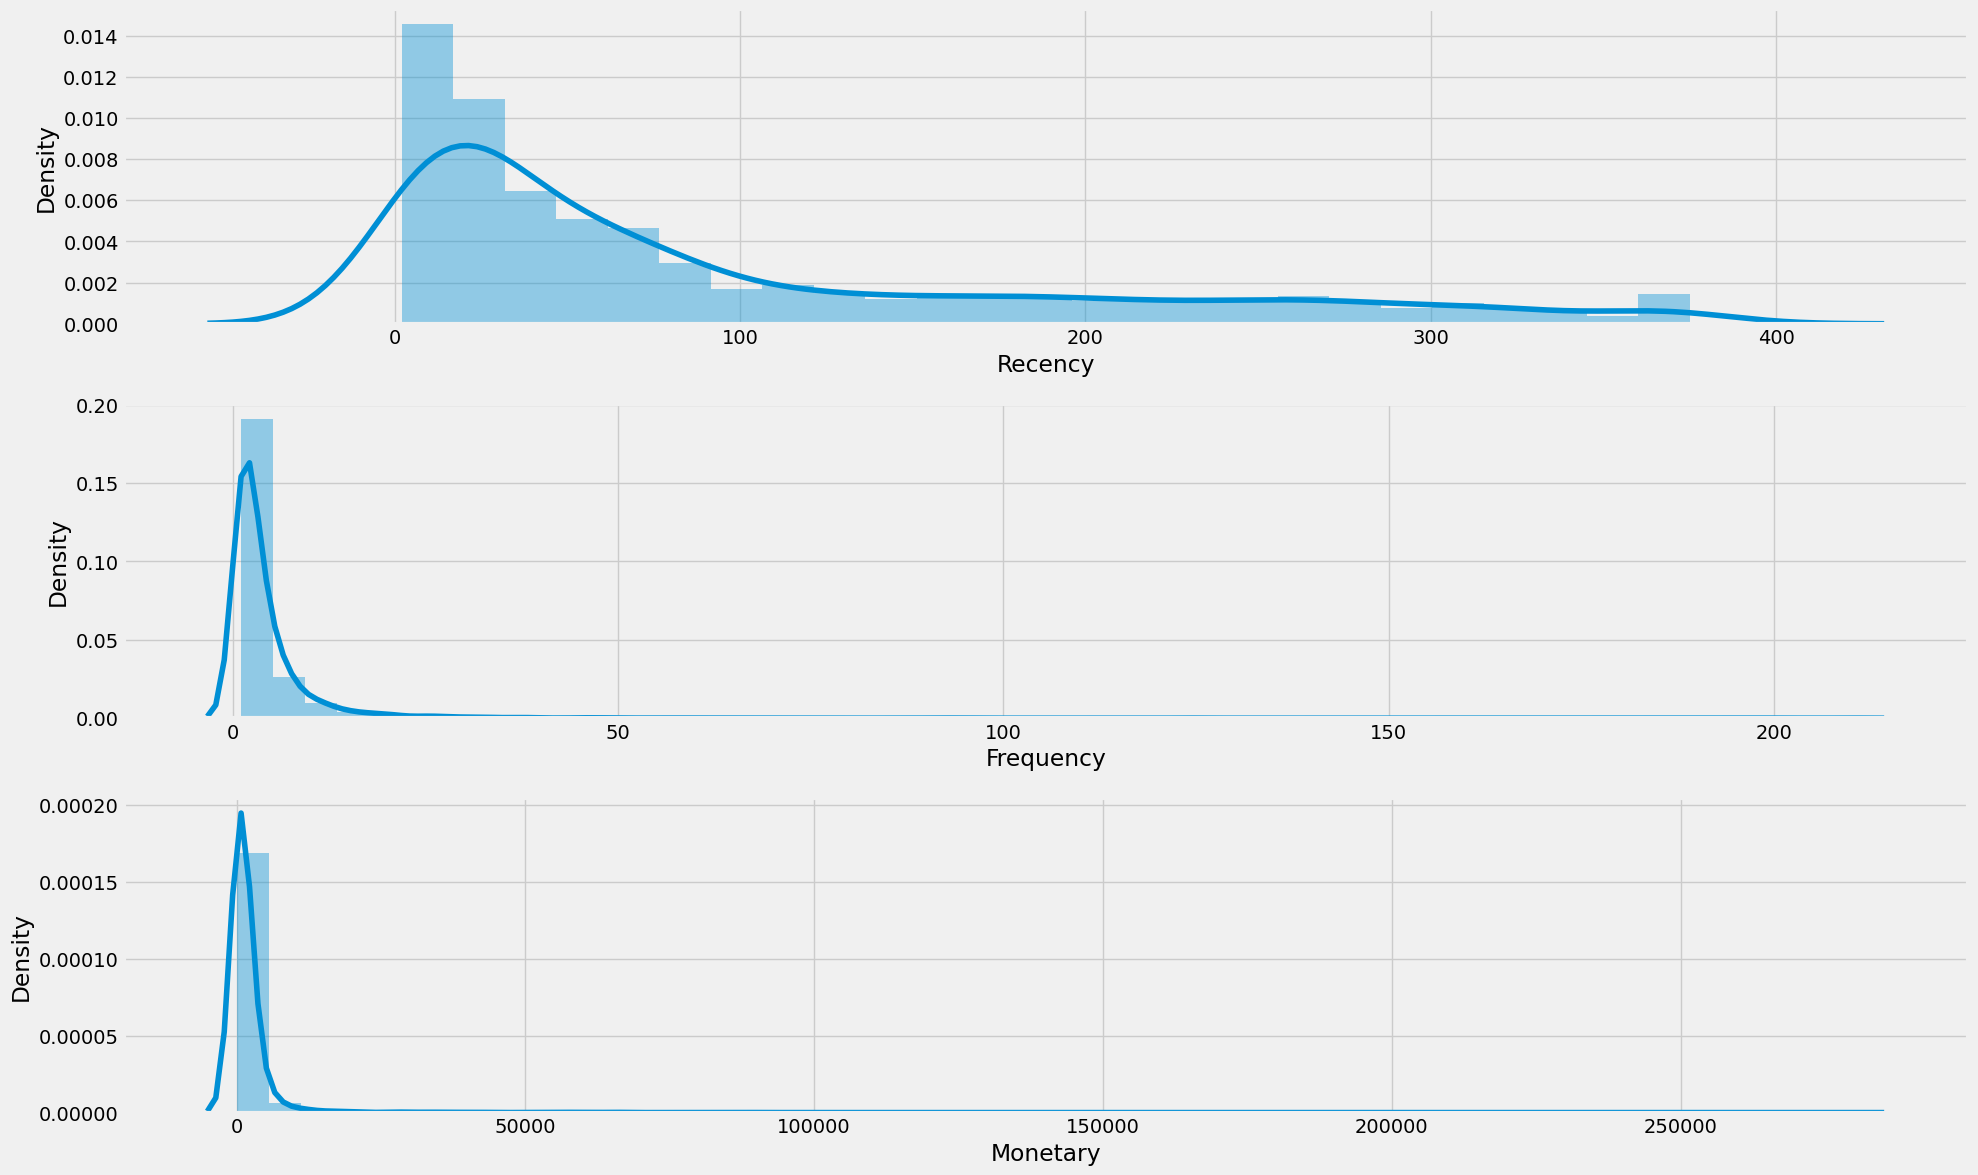

In [38]:
plt.style.use('fivethirtyeight')
f,ax = plt.subplots(figsize=(20, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

# **Applying Kmeans Clustering on Data**

In [39]:
class Kmeans():
    def __init__(self,df):
        self.df = df
    def Scale_data(self):
        #Scaling Dataset
        self.df2 = pd.DataFrame()
        self.df2["Recency"]  = self.df.Recency
        self.df2["Frequency"]  = self.df.Frequency
        self.df2["Monetary"]  = self.df.Monetary
        #Applying Min Max Scaler
        sc = MinMaxScaler((0, 1))
        self.df3 = sc.fit_transform(self.df2)
        return self.df3
    def apply_kmeans(self):
        #initializing Kmeans object model
        kmeans = KMeans(n_clusters= 5, init= 'k-means++')
        kmeans.fit(self.Scale_data())
        clusters = kmeans.labels_
        self.df["Clusters"] = clusters+1
        return self.df 

In [40]:
kmeans= Kmeans(rfm)
data1 = kmeans.apply_kmeans()
data1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Clusters
Customer ID,,,,,,,,,
12346.00000,327,1,77183.60000,1,1,5,115,Hibernating,5
12347.00000,3,7,4310.00000,5,5,5,555,Champions,3
12348.00000,76,4,1797.24000,2,4,4,244,At_Risk,1
12349.00000,20,1,1757.55000,4,1,4,414,Promising,3
12350.00000,311,1,334.40000,1,1,2,112,Hibernating,5


In [41]:
#Colors pallets for plots 
s = '''
        chartreuse, cornflowerblue,
        cornsilk, crimson, cyan,aliceblue, antiquewhite, aqua, aquamarine, azure,
        beige, bisque, black, blanchedalmond, blue,
        blueviolet, brown, burlywood, cadetblue,darkblue, darkcyan,
        darkgoldenrod, darkgray, darkgrey, darkgreen,
        darkkhaki, darkmagenta, darkolivegreen, darkorange,
        darkorchid, darkred, darksalmon, darkseagreen,
        darkslateblue, darkslategray, darkslategrey,
        darkturquoise, darkviolet, deeppink, deepskyblue,
        dimgray, dimgrey, dodgerblue, firebrick,
        floralwhite, forestgreen, fuchsia, gainsboro,
        ghostwhite, gold, goldenrod, gray, grey, green,
        greenyellow, honeydew, hotpink, indianred, indigo,
        ivory, khaki, lavender, lavenderblush, lawngreen,
        lemonchiffon, lightblue, lightcoral, lightcyan,
        lightgoldenrodyellow, lightgray, lightgrey,
        lightgreen, lightpink, lightsalmon, lightseagreen,
        lightskyblue, lightslategray, lightslategrey,
        lightsteelblue, lightyellow, lime, limegreen,
        linen, magenta, maroon, mediumaquamarine,
        mediumblue, mediumorchid, mediumpurple,
        mediumseagreen, mediumslateblue, mediumspringgreen,
        mediumturquoise, mediumvioletred, midnightblue,
        mintcream, mistyrose, moccasin, navajowhite, navy,
        oldlace, olive, olivedrab, orange, orangered,
        orchid, palegoldenrod, palegreen, paleturquoise,
        palevioletred, papayawhip, peachpuff, peru, pink,
        plum, powderblue, purple, red, rosybrown,
        royalblue, saddlebrown, salmon, sandybrown,
        seagreen, seashell, sienna, silver, skyblue,
        slateblue, slategray, slategrey, snow, springgreen,
        steelblue, tan, teal, thistle, tomato, turquoise,
        violet, wheat, white, whitesmoke, yellow,
        yellowgreen
        '''
colors1=s.split(',')
colors1=[l.replace('\n','') for l in colors1]
colors1=[l.replace(' ','') for l in colors1]

# **Creating Frequency Monetary and Recency Scatter Plots with relation with eachother with Clusters**

In [42]:
def plot_feat1_feat2(feat1, feat2,seg_col ="rfm_rate_customers") :  
    t = []
    #creating Scatter plots iterating data frames and plotting
    for pos,n in enumerate(data1[seg_col].unique()):
        d = data1.loc[data1[seg_col]==n]
        trace1 = go.Scatter(
            x = d[feat1],
            y = d[feat2],
            name = str(n),
            mode = 'markers',
            marker = dict(color = colors1[pos],
                line = dict(
                    width = 1)))
        t.append(trace1)
    layout = dict(title = feat1 +" "+"vs"+" "+ feat2+f"on basis of {seg_col}",
                    yaxis = dict(title = feat2,zeroline = False),
                    xaxis = dict(title = feat1, zeroline = False)
                  )

    plots = t

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [43]:
plot_feat1_feat2("Recency","Monetary","Clusters")
plot_feat1_feat2("Recency","Frequency","Clusters")
plot_feat1_feat2("Monetary","Frequency","Clusters")

## Time for Action

Now that we have all the scores for the customers and we have been able to categorize them into 10 groups, it's time for action. We will be using metrics for this process, not scores. We will be focusing on the groups that need a better customer relationship and try to figure out what we can do in order to make that specific segment purchase more frequently and become loyal. Thanks to RFM scores of the segments, we know what exactly that segment needs.

In [44]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency         Monetary      
                         mean count      mean count       mean count
Segment                                                             
About_to_Sleep       54.50427   351   1.16239   351  461.06151   351
At_Risk             156.06207   580   2.86552   580 1076.50643   580
Cant_Loose          133.42857    63   8.38095    63 2796.15587    63
Champions             6.87678   633  12.41706   633 6857.93548   633
Hibernating         218.89765  1065   1.10141  1065  487.70758  1065
Loyal_Customers      34.46917   827   6.45828   827 2856.72033   827
Need_Attention       54.06452   186   2.32796   186  889.22640   186
New_Customers         7.85714    42   1.00000    42  388.21286    42
Potential_Loyalists  18.12398   492   2.01016   492 1034.90547   492
Promising            24.35000   100   1.00000   100  351.79780   100

take a closer look at the customers that need attention:

In [45]:
rfm[rfm["Segment"] == "Need_Attention"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Clusters
Customer ID,,,,,,,,,
12360.00000,53,3,2662.06000,3,3,5,335,Need_Attention,1
12372.00000,73,3,1298.04000,3,3,4,334,Need_Attention,1
12413.00000,68,3,758.10000,3,3,3,333,Need_Attention,1
12456.00000,45,3,3181.04000,3,3,5,335,Need_Attention,3
12536.00000,44,3,12601.83000,3,3,5,335,Need_Attention,3


**Need_Attention** segment has 207 customers that last purchased nearly 2 months ago, despite the fact that they don't frequently purchase, they spend quite a good amount of money. So we should be focusing on this group. In order to make them transform into a customer that purchases frequently, we can offer them some discount with a time limit of 30 days. So that they would revisit and purchase.

**Can't_Loose** segment has purchased for 9 times this year but the last date of this was nearly 4 months, they spend a good amount of money and they used to be our loyal customers, we can't loose them. We should put this 77 customers into our loyalty program, offer them seasonal discounts, make them feel special while purchasing from our company and make them loyal again. We can export the customer id list into an excel file and pass this file to our Marketing Department.  

In [46]:
marketing_df = pd.DataFrame()
marketing_df["Cant_Loose"] = rfm[rfm["Segment"] == "Cant_Loose"].index

In [47]:
marketing_df.head()

,Cant_Loose
0,12643.00000
1,12853.00000
2,12868.00000
3,12947.00000
4,12980.00000


change the dtype of Customer ID variable in order to get rid of the decimal part:

In [48]:
marketing_df['Cant_Loose'] = marketing_df['Cant_Loose'].astype(int)
marketing_df.head()

,Cant_Loose
0,12643
1,12853
2,12868
3,12947
4,12980


In [49]:
marketing_df.info

<bound method DataFrame.info of     Cant_Loose
0        12643
1        12853
2        12868
3        12947
4        12980
..         ...
58       18037
59       18073
60       18094
61       18168
62       18260

[63 rows x 1 columns]>

In [50]:
# marketing_df.to_csv("cant_loose.csv")

In [51]:
# customer_df = rfm.sort_values(by='Recency')
# top_15_customers = customer_df.head(15)
# top_15_customers
# colors = ['red', 'blue', 'green', 'purple', 'orange', 'gray', 'pink', 'brown', 'yellow', 'teal', 'magenta', 'cyan', 'olive', 'maroon', 'navy']
# # plt.pie(top_15_customers['Recency'], labels=top_15_customers.index, colors=colors, autopct='%1.1f%%')
# plt.pie(top_15_customers['Recency'], labels=top_15_customers.index, autopct='%1.1f%%')
# plt.title('Top 15 Customers by Recency')
# plt.show()

In [52]:
customer_df1 = rfm.sort_values(by='RecencyScore')
customer_df2 = rfm.sort_values(by='FrequencyScore')
customer_df3 = rfm.sort_values(by='MonetaryScore')
top_15_customers1 = customer_df1.head(15)
top_15_customers2 = customer_df2.tail(15)
top_15_customers3 = customer_df3.tail(15)
top_15_customers1

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Clusters
Customer ID,,,,,,,,,
15344.00000,2,3,563.94000,5,3,3,533,Potential_Loyalists,3
13297.00000,9,4,2089.85000,5,4,5,545,Champions,3
13298.00000,2,1,360.00000,5,1,2,512,New_Customers,3
15555.00000,13,16,4805.17000,5,5,5,555,Champions,3
17350.00000,9,4,1286.07000,5,4,4,544,Champions,3
17346.00000,5,15,2676.56000,5,5,5,555,Champions,3
13305.00000,5,10,2000.86000,5,5,4,554,Champions,3
14321.00000,12,5,1530.75000,5,4,4,544,Champions,3
13309.00000,8,5,1456.79000,5,4,4,544,Champions,3


In [53]:
top_15_customers2

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Clusters
Customer ID,,,,,,,,,
17191.00000,29,7,2095.13000,4,5,5,455,Loyal_Customers,3
17193.00000,37,7,1699.30000,3,5,4,354,Loyal_Customers,3
14704.00000,12,9,1546.91000,5,5,4,554,Champions,3
14702.00000,2,17,3292.14000,5,5,5,555,Champions,3
14701.00000,12,9,2549.37000,5,5,5,555,Champions,3
17203.00000,37,6,3563.85000,3,5,5,355,Loyal_Customers,3
14696.00000,5,7,2078.95000,5,5,5,555,Champions,3
17211.00000,28,8,2317.22000,4,5,5,455,Loyal_Customers,3
14688.00000,9,21,5630.87000,5,5,5,555,Champions,3


In [54]:
top_15_customers3

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Clusters
Customer ID,,,,,,,,,
15321.00000,72,3,2748.31000,3,3,5,335,Need_Attention,1
15311.00000,2,91,60767.90000,5,5,5,555,Champions,3
15301.00000,52,12,5070.35000,3,5,5,355,Loyal_Customers,1
18283.00000,5,16,2094.88000,5,5,5,555,Champions,3
15298.00000,3,12,4799.90000,5,5,5,555,Champions,3
15296.00000,52,6,3672.86000,3,5,5,355,Loyal_Customers,1
15291.00000,27,15,4668.30000,4,5,5,455,Loyal_Customers,3
15290.00000,6,18,7943.22000,5,5,5,555,Champions,3
15288.00000,44,5,2306.52000,3,4,5,345,Loyal_Customers,3
